In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import StandardScaler
# linkage: 계층형 군집 분석, dendrogram: 계층구조 나무, fcluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
df_raw = pd.read_csv('data/competency.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [13]:
# df_raw_1 : scaling한 데이터 저장하기 위해 복사
df_raw_1 = df_raw.copy()

### 데이터 전처리

In [15]:
# 데이터 표준화
v_feature_name = df_raw_1.columns
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw_1)
df_raw_scaled= pd.DataFrame(df_raw_scaled, columns = v_feature_name)
df_raw_scaled.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.807603,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301
1,-0.136475,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012
2,0.531976,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868
3,-0.303588,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254
4,1.367539,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012


In [17]:
# 목표 변수
df_raw_y = df_raw_scaled[['EVAL']]
# 설명 변수
df_raw_x = df_raw_scaled.drop('EVAL', axis = 1)

In [22]:
df_raw_1 = df_raw_y.join(df_raw_x)
df_raw_1.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.807603,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301
1,-0.136475,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012
2,0.531976,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868
3,-0.303588,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254
4,1.367539,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012


### Dendrogram

Text(0, 0.5, 'sample index')

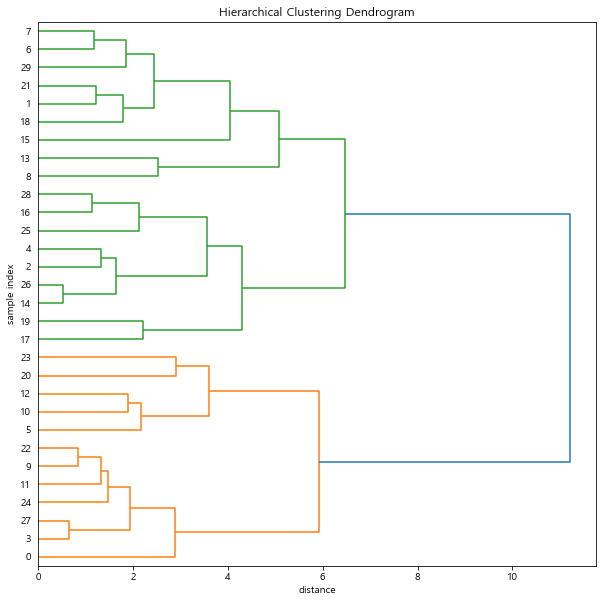

In [19]:
# 연결: ward, 거리 계산: Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")

# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

# 연결: average, 거리 계산: minkowski
Z_Minkowski = linkage(df_raw_x, method = "average", metric = "minkowski")

#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,10))
ax = plt.subplot(111) 

# DataFrame 변경:Z_ward, Z_average, Z_Minkowski

# Z_ward
dendrogram(Z_ward, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

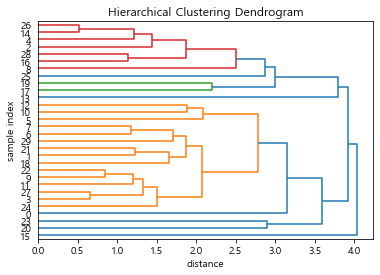

In [20]:
# dataframe 변경: Z_average

dendrogram(Z_average, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

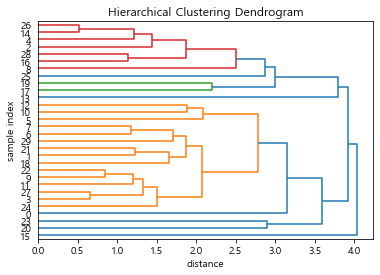

In [21]:
# dataframe 변경: Z_Minkowski

dendrogram(Z_Minkowski, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

### 계층형 군집 생성

In [25]:
# linkage  함수를 통해 얻은 Zward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion='distance')

# 데이터에 계층형 군집 결과 입력
df_raw['ClusterHierarchical'] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


### 군집별 데이터 요약

In [28]:
# 집계 함수를 이용한 군집별 데이터 요약
ds_summary_hc = df_raw.groupby('ClusterHierarchical').agg(['min', 'mean', 'max'])
ds_summary_hc

EVAL                DISSATIS                PRIVILEGE  \
                     min       mean max      min       mean max       min   
ClusterHierarchical                                                         
1                     43  57.428571  67       51  58.857143  66        30   
2                     40  53.200000  69       37  49.400000  62        33   
3                     50  71.888889  85       58  73.888889  85        54   
4                     68  70.000000  72       82  82.500000  83        72   
5                     58  69.142857  82       61  72.714286  90        39   

                                   CHANCE  ...     ADVANCE                 \
                          mean max    min  ... max     min       mean max   
ClusterHierarchical                        ...                              
1                    43.571429  52     39  ...  50      51  59.428571  66   
2                    46.800000  57     34  ...  58      43  52.000000  58   
3                    63.333333  71     54  ...  75      55  74.333333  88   
4                    77.500000  83     45  ...  67      59  65.000000  71   
5                    47.142857  52     54  ...  72      60  66.285714  75   

                    CRITISM                PROMOTION                 
                        min       mean max       min       mean max  
ClusterHierarchical                                                  
1                        74  81.142857  92        33  38.571429  45  
2                        49  60.000000  67        25  35.000000  49  
3                        74  79.000000  86        46  54.666667  72  
4                        77  80.000000  83        31  33.000000  35  
5                        54  72.000000  85        35  40.714286  47  

[5 rows x 21 columns]

In [29]:
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level0

Index(['EVAL', 'EVAL', 'EVAL', 'DISSATIS', 'DISSATIS', 'DISSATIS', 'PRIVILEGE',
       'PRIVILEGE', 'PRIVILEGE', 'CHANCE', 'CHANCE', 'CHANCE', 'ADVANCE',
       'ADVANCE', 'ADVANCE', 'CRITISM', 'CRITISM', 'CRITISM', 'PROMOTION',
       'PROMOTION', 'PROMOTION'],
      dtype='object')

In [31]:
level1 = ds_summary_hc.columns.get_level_values(1)
level1

Index(['min', 'mean', 'max', 'min', 'mean', 'max', 'min', 'mean', 'max', 'min',
       'mean', 'max', 'min', 'mean', 'max', 'min', 'mean', 'max', 'min',
       'mean', 'max'],
      dtype='object')

In [32]:
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc

,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,CHANCE_min,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
ClusterHierarchical,,,,,,,,,,,,,,,,,,,,,
1,43,57.428571,67,51,58.857143,66,30,43.571429,52,39,...,50,51,59.428571,66,74,81.142857,92,33,38.571429,45
2,40,53.200000,69,37,49.400000,62,33,46.800000,57,34,...,58,43,52.000000,58,49,60.000000,67,25,35.000000,49
3,50,71.888889,85,58,73.888889,85,54,63.333333,71,54,...,75,55,74.333333,88,74,79.000000,86,46,54.666667,72
4,68,70.000000,72,82,82.500000,83,72,77.500000,83,45,...,67,59,65.000000,71,77,80.000000,83,31,33.000000,35
5,58,69.142857,82,61,72.714286,90,39,47.142857,52,54,...,72,60,66.285714,75,54,72.000000,85,35,40.714286,47


In [33]:
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.428571,67,51,58.857143,66,30,43.571429,52,...,50,51,59.428571,66,74,81.142857,92,33,38.571429,45
1,2,40,53.200000,69,37,49.400000,62,33,46.800000,57,...,58,43,52.000000,58,49,60.000000,67,25,35.000000,49
2,3,50,71.888889,85,58,73.888889,85,54,63.333333,71,...,75,55,74.333333,88,74,79.000000,86,46,54.666667,72
3,4,68,70.000000,72,82,82.500000,83,72,77.500000,83,...,67,59,65.000000,71,77,80.000000,83,31,33.000000,35
4,5,58,69.142857,82,61,72.714286,90,39,47.142857,52,...,72,60,66.285714,75,54,72.000000,85,35,40.714286,47


### K-평균 군집 분석

In [34]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({'NumberofCluster':cluster_range, 'Error': clus_error})
ds_error

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.353633
3,4,79.268976
4,5,68.657672
5,6,60.494021
6,7,50.448510
7,8,45.008790
8,9,37.680251
9,10,31.284786


Text(0, 0.5, 'Sum of squared distance')

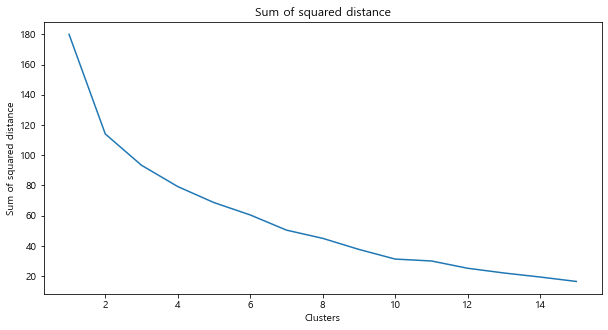

In [35]:
plt.figure(figsize=(10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [36]:
# cluster = 5 선택

In [37]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_] # K 평균 이용했을 때의 군집 결과
df_raw['ClusterKmeans'] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,3
1,63,64,51,54,63,73,47,5,3
2,71,70,68,69,76,86,48,3,5
3,61,63,45,47,54,84,35,1,3
4,81,78,56,66,71,83,47,3,5


### K 평균 군집별 데이터 요약

In [40]:
ds_summary_km = df_raw.drop("ClusterHierarchical", axis = 1, inplace=False).groupby("ClusterKmeans").agg(["min", "mean", "max"])

In [41]:
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
1,2,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
2,3,43,61.071,82,51,63.500,82,30,46.643,68,...,62,51,63.143,75,66,78.286,92,33,40.786,52
3,4,81,81.000,81,90,90.000,90,50,50.000,50,...,72,60,60.000,60,54,54.000,54,36,36.000,36
4,5,65,74.625,85,60,75.875,85,54,62.750,71,...,75,55,75.625,88,74,79.125,86,46,55.000,72


### 실루엣 계수 산출

In [ ]:
# 각각의 실루엣 계수값 계산

In [47]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012


In [48]:
df_raw_y = df_raw['ClusterKmeans']
df_raw_y.head()

0    3
1    3
2    5
3    3
4    5
Name: ClusterKmeans, dtype: int32

In [49]:
score_samples = silhouette_samples(df_raw_x, df_raw_y)
df_raw['silhouette_coef'] = score_samples
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,silhouette_coef
0,43,51,30,39,61,92,45,1,3,0.307248
1,63,64,51,54,63,73,47,5,3,0.387621
2,71,70,68,69,76,86,48,3,5,0.284776
3,61,63,45,47,54,84,35,1,3,0.387285
4,81,78,56,66,71,83,47,3,5,0.233644


In [50]:
# 전체 실루엣 계수
sil_score = silhouette_score(df_raw_x, df_raw_y)
print('실루엣계수 : {0:.3f}'.format(sil_score))

실루엣계수 : 0.264


In [51]:
from matplotlib import cm

In [59]:
def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters = n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    # fit_predict = fit + labels_????
    silhouette_values = silhouette_samples(X_features, Y_labels, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []
    
    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height = 1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouettes)
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Number of Cluster: '+ str(n_cluster) + '\n' + 'Silhouette Score : ' + str(round(silhouette_avg, 3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

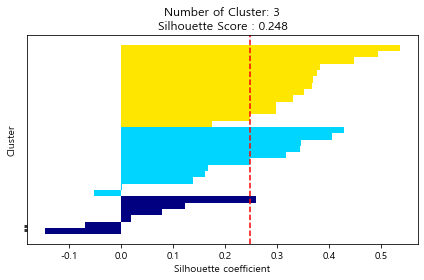

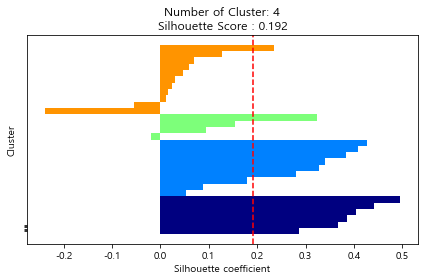

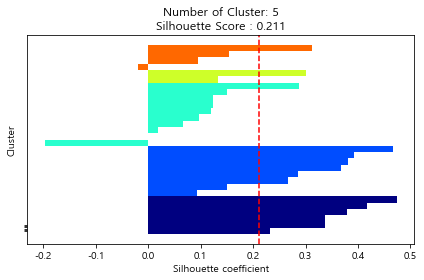

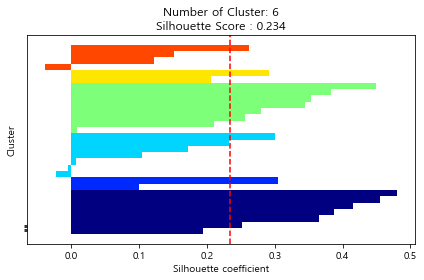

In [60]:
silhouetteViz(3, df_raw_x)
silhouetteViz(4, df_raw_x)
silhouetteViz(5, df_raw_x)
silhouetteViz(6, df_raw_x)

### inertia 산출

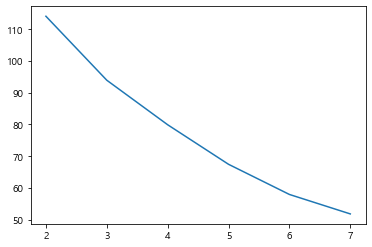

In [62]:
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters= k, random_state=1234)
    km.fit(df_raw_x)
    inertia.append(km.inertia_)
plt.plot(range(2, 8), inertia)
plt.show()

# 실습

- 붓꽃 데이터로 실습해서 원본 데이터 마지막 열에 군집 데이터 입력,
- pivot table aggfunc count로 

In [63]:
df_iris = pd.read_csv('data/IRIS.csv')
df_iris

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
df_iris_y = df_iris['SPECIES']
df_iris_y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: SPECIES, Length: 150, dtype: object

In [65]:
df_iris_x = df_iris.drop(columns = 'SPECIES')
df_iris_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 표준화

In [67]:
# 데이터 표준화
v_feature_name = df_iris_x.columns
scaler = StandardScaler()
df_iris_scaled_x = scaler.fit_transform(df_iris_x)
df_iris_scaled_x= pd.DataFrame(df_iris_scaled_x, columns = v_feature_name)
df_iris_scaled_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [68]:
df_iris_scaled = df_iris_scaled_x.join(df_iris_y)
df_iris_scaled

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


Text(0, 0.5, 'sample index')

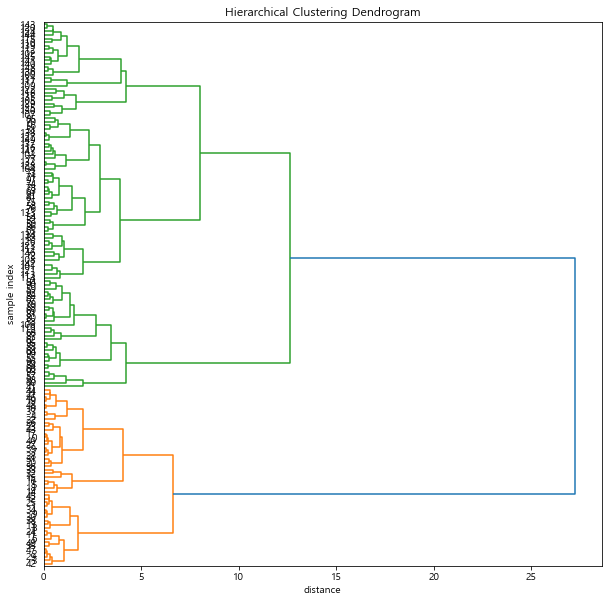

In [69]:
# 연결: ward, 거리 계산: Euclidean
Z_ward = linkage(df_iris_scaled_x, method = "ward", metric = "euclidean")

# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_iris_scaled_x, method = "average", metric = "euclidean")

# 연결: average, 거리 계산: minkowski
Z_Minkowski = linkage(df_iris_scaled_x, method = "average", metric = "minkowski")

#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,10))
ax = plt.subplot(111) 

# DataFrame 변경:Z_ward, Z_average, Z_Minkowski

# Z_ward
dendrogram(Z_ward, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

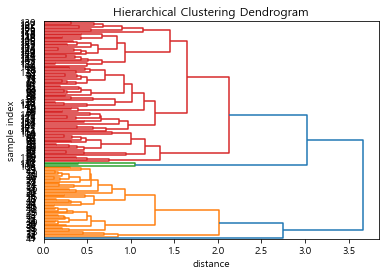

In [70]:
# dataframe 변경: Z_average

dendrogram(Z_average, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

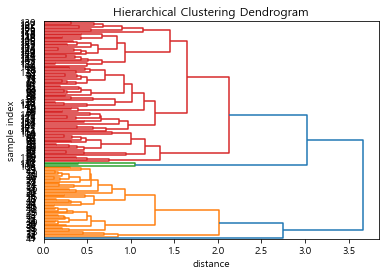

In [71]:
# dataframe 변경: Z_Minkowski

dendrogram(Z_Minkowski, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [74]:
df_iris['SPECIES'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 계층형 군집 생성

In [75]:
# linkage  함수를 통해 얻은 Zward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t = 3, criterion='distance')

# 데이터에 계층형 군집 결과 입력
df_iris['ClusterHierarchical'] = cluster_hierarchical
df_iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical
0,5.1,3.5,1.4,0.2,setosa,3
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,3


### 군집별 데이터 요약

In [76]:
# 집계 함수를 이용한 군집별 데이터 요약
iris_summary_hc = df_iris.groupby('ClusterHierarchical').agg(['min', 'mean', 'max'])
iris_summary_hc

SEPAL_LENGTH                SEPAL_WIDTH                 \
                             min      mean  max         min      mean  max   
ClusterHierarchical                                                          
1                            4.3  4.720000  5.0         2.9  3.140000  3.4   
2                            5.2  5.528571  5.8         3.8  4.042857  4.4   
3                            4.6  5.122727  5.5         3.3  3.545455  3.8   
4                            4.5  4.900000  5.1         2.0  2.300000  2.5   
5                            5.4  5.625000  5.7         2.8  2.925000  3.0   
6                            4.9  5.670588  6.3         2.2  2.476471  2.7   
7                            5.6  6.076923  6.7         2.5  2.653846  2.8   
8                            5.9  6.353125  7.0         2.8  2.990625  3.4   
9                            7.2  7.475000  7.7         2.6  2.912500  3.2   
10                           7.2  7.600000  7.9         3.6  3.733333  3.8   
11                           6.2  6.660000  7.1         3.0  3.186667  3.4   

                    PETAL_LENGTH                PETAL_WIDTH                 
                             min      mean  max         min      mean  max  
ClusterHierarchical                                                         
1                            1.1  1.440000  1.9         0.1  0.195000  0.3  
2                            1.2  1.471429  1.7         0.1  0.285714  0.4  
3                            1.0  1.486364  1.9         0.1  0.277273  0.6  
4                            1.3  2.880000  3.5         0.3  0.880000  1.1  
5                            3.6  4.212500  4.5         1.2  1.337500  1.5  
6                            3.5  4.105882  5.0         1.0  1.241176  1.7  
7                            4.8  5.123077  5.8         1.4  1.838462  2.4  
8                            4.0  4.831250  5.8         1.2  1.603125  2.2  
9                            5.8  6.312500  6.9         1.6  1.975000  2.3  
10                           6.1  6.400000  6.7         2.0  2.233333  2.5  
11                           5.1  5.540000  6.0         2.0  2.266667  2.5

In [77]:
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = iris_summary_hc.columns.get_level_values(0)
level0

Index(['SEPAL_LENGTH', 'SEPAL_LENGTH', 'SEPAL_LENGTH', 'SEPAL_WIDTH',
       'SEPAL_WIDTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_LENGTH',
       'PETAL_LENGTH', 'PETAL_WIDTH', 'PETAL_WIDTH', 'PETAL_WIDTH'],
      dtype='object')

In [78]:
level1 = iris_summary_hc.columns.get_level_values(1)
level1

Index(['min', 'mean', 'max', 'min', 'mean', 'max', 'min', 'mean', 'max', 'min',
       'mean', 'max'],
      dtype='object')

In [79]:
iris_summary_hc.columns = level0 + '_' + level1
iris_summary_hc

,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
ClusterHierarchical,,,,,,,,,,,,
1,4.3,4.720000,5.0,2.9,3.140000,3.4,1.1,1.440000,1.9,0.1,0.195000,0.3
2,5.2,5.528571,5.8,3.8,4.042857,4.4,1.2,1.471429,1.7,0.1,0.285714,0.4
3,4.6,5.122727,5.5,3.3,3.545455,3.8,1.0,1.486364,1.9,0.1,0.277273,0.6
4,4.5,4.900000,5.1,2.0,2.300000,2.5,1.3,2.880000,3.5,0.3,0.880000,1.1
5,5.4,5.625000,5.7,2.8,2.925000,3.0,3.6,4.212500,4.5,1.2,1.337500,1.5
6,4.9,5.670588,6.3,2.2,2.476471,2.7,3.5,4.105882,5.0,1.0,1.241176,1.7
7,5.6,6.076923,6.7,2.5,2.653846,2.8,4.8,5.123077,5.8,1.4,1.838462,2.4
8,5.9,6.353125,7.0,2.8,2.990625,3.4,4.0,4.831250,5.8,1.2,1.603125,2.2
9,7.2,7.475000,7.7,2.6,2.912500,3.2,5.8,6.312500,6.9,1.6,1.975000,2.3


In [80]:
iris_summary_hc.reset_index(inplace = True)
iris_summary_hc

,ClusterHierarchical,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,4.720000,5.0,2.9,3.140000,3.4,1.1,1.440000,1.9,0.1,0.195000,0.3
1,2,5.2,5.528571,5.8,3.8,4.042857,4.4,1.2,1.471429,1.7,0.1,0.285714,0.4
2,3,4.6,5.122727,5.5,3.3,3.545455,3.8,1.0,1.486364,1.9,0.1,0.277273,0.6
3,4,4.5,4.900000,5.1,2.0,2.300000,2.5,1.3,2.880000,3.5,0.3,0.880000,1.1
4,5,5.4,5.625000,5.7,2.8,2.925000,3.0,3.6,4.212500,4.5,1.2,1.337500,1.5
5,6,4.9,5.670588,6.3,2.2,2.476471,2.7,3.5,4.105882,5.0,1.0,1.241176,1.7
6,7,5.6,6.076923,6.7,2.5,2.653846,2.8,4.8,5.123077,5.8,1.4,1.838462,2.4
7,8,5.9,6.353125,7.0,2.8,2.990625,3.4,4.0,4.831250,5.8,1.2,1.603125,2.2
8,9,7.2,7.475000,7.7,2.6,2.912500,3.2,5.8,6.312500,6.9,1.6,1.975000,2.3
9,10,7.2,7.600000,7.9,3.6,3.733333,3.8,6.1,6.400000,6.7,2.0,2.233333,2.5


### K-평균 군집 분석

In [36]:
# cluster = 3 

In [81]:
clus = KMeans(3)
clus.fit(df_iris_scaled_x)
cluster_kmeans = [i+1 for i in clus.labels_] # K 평균 이용했을 때의 군집 결과
df_iris['ClusterKmeans'] = cluster_kmeans
df_iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans
0,5.1,3.5,1.4,0.2,setosa,3,2
1,4.9,3.0,1.4,0.2,setosa,1,2
2,4.7,3.2,1.3,0.2,setosa,1,2
3,4.6,3.1,1.5,0.2,setosa,1,2
4,5.0,3.6,1.4,0.2,setosa,3,2


In [91]:
df_iris['ClusterKmeans'].value_counts()

3    53
2    50
1    47
Name: ClusterKmeans, dtype: int64

In [94]:
df_iris.pivot_table(index = 'ClusterKmeans', values = 'SPECIES', aggfunc='count')

,SPECIES
ClusterKmeans,
1,47
2,50
3,53


### K 평균 군집별 데이터 요약

In [82]:
iris_summary_km = df_raw.drop("ClusterHierarchical", axis = 1, inplace=False).groupby("ClusterKmeans").agg(["min", "mean", "max"])

In [84]:
level0 = iris_summary_km.columns.get_level_values(0)
level1 = iris_summary_km.columns.get_level_values(1)
iris_summary_km.columns = level0 + "_" + level1
iris_summary_km.reset_index(inplace = True)
iris_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,silhouette_coef_min,silhouette_coef_mean,silhouette_coef_max
0,1,40,53.200,69,37,49.400,62,33,46.800,57,...,58,49,60.000,67,25,35.000,49,-0.074,0.165,0.340
1,2,68,70.000,72,82,82.500,83,72,77.500,83,...,71,77,80.000,83,31,33.000,35,0.133,0.229,0.324
2,3,43,61.071,82,51,63.500,82,30,46.643,68,...,75,66,78.286,92,33,40.786,52,0.028,0.276,0.485
3,4,81,81.000,81,90,90.000,90,50,50.000,50,...,60,54,54.000,54,36,36.000,36,0.000,0.000,0.000
4,5,65,74.625,85,60,75.875,85,54,62.750,71,...,88,74,79.125,86,46,55.000,72,0.145,0.348,0.494
